In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
with open('data/tsp_noise_effect.json') as f:
    data = json.load(f)
    
noise_scales = data['noise_scales']
runs = data['iterations']

In [3]:
df = []

for run in runs:
    for key, value in run.items():
        for n,v in zip(noise_scales, value):
            df.append({
                'noise_type': key,
                'noise_scale': n,
                'total_length': v
            })
            
df = pd.DataFrame(df)

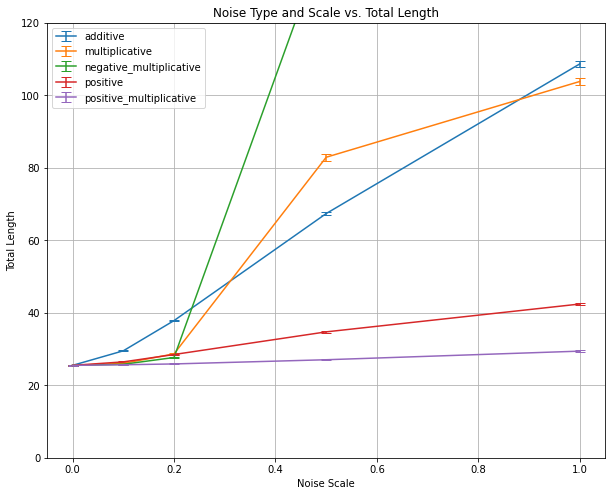

In [4]:
# Group the data by noise type and noise scale
grouped_data = df.groupby(['noise_type', 'noise_scale']).agg(['mean', 'sem'])['total_length'].reset_index()

# Calculate the 95% confidence interval
grouped_data['ci_95'] = grouped_data['sem'] * 1.96

plt.figure(figsize=(10,8))

# Plot the lines with error bars for each noise type
for noise_type in df['noise_type'].unique():
    temp_df = grouped_data[grouped_data['noise_type'] == noise_type]
    plt.errorbar(temp_df['noise_scale'], temp_df['mean'], yerr=temp_df['ci_95'], label=noise_type, capsize=5)

# Customize the plot
plt.title("Noise Type and Scale vs. Total Length")
plt.xlabel("Noise Scale")
plt.ylabel("Total Length")
plt.ylim(0, 120)
plt.legend()
plt.grid()

# Show the plot
plt.show()
